In [1]:
from training_functions import *
from merging import *
from utils import *
from model_evaluation import ModelEvaluation

In [2]:
df_kahle_fin_nn = get_nn_features_kahle()


X_kahle_nn = df_kahle_fin_nn.drop([ 
    'src_id',
    'diffusion_mean_cm2_s',
    'stru_label', 
    'stru_id', 
    'structure', 
    'group', 
    'label', 
    'diffusion_sem_cm2_s', 
    'n_Li', 
    'sigma_S_cm', 
    'sigma_S_cm_sem', 
    'sigma_S_cm_err'
 ], axis=1)

df_mpdb_nn = get_nn_features_mpdb()

X_mpdb_nn = df_mpdb_nn.drop([ 
    'material_id',
 ], axis=1)


df_mp_exp = get_nn_features_exp()
X_exp_nn = df_mp_exp.drop(['material_id', 'sigma_S_cm', 'icsd', 'sample_weight'], axis = 1)

In [3]:
feature_names_nn = X_kahle_nn.columns.tolist()
feature_names_nn = np.array(feature_names_nn)

X_kahle_nn = X_kahle_nn.to_numpy()
X_mpdb_nn = X_mpdb_nn.to_numpy()
X_exp_nn = X_exp_nn.to_numpy()

scaler = StandardScaler().fit(X_mpdb_nn)

X_mpdb_nn = scaler.transform(X_mpdb_nn)
X_kahle_nn = scaler.transform(X_kahle_nn)
X_exp_nn = scaler.transform(X_exp_nn)

cnt_and_name_features_nn = {
    'robust': 3,
    'connected': 16,
    'disconnected': 16
    }

feature_weights_nn = [1 / cnt_and_name_features_nn[(x.split('_')[-2])] for x in feature_names_nn]

In [9]:
df_kahle_fin, cnt_and_name_features_kahle = get_featurizers_features_kahle()

X_kahle = df_kahle_fin.drop([ 
    'stru_label',
     'stru_id', 
     'group', 
     'structure', 
     'diffusion_mean_cm2_s', 
     'label', 
     'src_id', 
     'diffusion_sem_cm2_s', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err'
 ], axis=1)


X_kahle

,0_SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3,1_SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3,2_SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3,3_SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3,4_SOAP_features_partialS_outer_rcut-3_nmax-5_lmax-3,0_ape_features,5_bc_features,6_bc_features,7_bc_features,13_bc_features,...,12_vo_features,13_vo_features,14_vo_features,15_vo_features,16_vo_features,17_vo_features,18_vo_features,19_vo_features,0_xrd_features_pattern_length-20,1_xrd_features_pattern_length-20
0,-0.009158,0.012223,0.042855,0.126359,0.226665,4.003803,0.0,0.000000,0.750000,0.0,...,0.008981,0.002258,0.004172,0.002253,0.015429,0.003920,0.009444,0.001424,2.864172e-02,0.296543
1,0.000517,0.009323,0.000000,0.083504,0.200952,4.084688,0.0,0.000000,0.857143,0.0,...,0.010669,0.003331,0.001525,0.004933,0.004596,0.004616,0.002295,0.001106,3.890497e-02,0.309944
2,-0.035408,0.035408,0.041595,0.137073,0.192238,4.469375,1.0,0.000000,0.000000,0.0,...,0.000561,0.003479,0.001242,0.001681,0.000159,0.002292,0.002217,0.003825,3.320809e+06,0.373140
3,-0.014001,0.014001,0.059421,0.135787,0.195803,4.685127,0.0,0.666667,0.000000,0.0,...,0.001205,0.002106,0.008297,0.001383,0.005219,0.003713,0.005719,0.002306,4.566024e+06,0.416577
4,-0.035408,0.035408,0.041595,0.137073,0.192238,4.469375,0.0,0.600000,0.000000,0.0,...,0.004498,0.007316,0.002730,0.004138,0.001104,0.002041,0.001341,0.001874,6.291471e+06,0.391304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-0.018765,0.018765,0.036973,0.143270,0.191314,4.636300,0.0,0.285714,0.000000,0.0,...,0.004739,0.002829,0.001883,0.002056,0.001955,0.001726,0.000352,0.000005,7.094209e+06,0.358093
112,-0.003095,0.012808,0.000000,0.090892,0.178234,4.989085,0.6,0.000000,0.000000,0.0,...,0.005455,0.000871,0.001992,0.003206,0.002536,0.004056,0.003375,0.004266,2.410342e+06,0.373140
113,-0.018765,0.018765,0.036973,0.143270,0.191314,4.636300,0.0,0.571429,0.000000,0.0,...,0.005324,0.001373,0.000386,0.002148,0.001341,0.000021,0.002659,0.000012,6.935407e+06,0.207542
114,-0.032807,0.032807,0.012405,0.101409,0.140984,5.569229,0.0,0.588235,0.000000,0.0,...,0.001948,0.002948,0.002138,0.003332,0.003425,0.004597,0.003369,0.002609,1.273970e+06,0.373140


In [4]:
df_mpdb_plane, cnt_and_name_features_mpdb = get_featurizers_features_mpdb()

X_mpdb = df_mpdb_plane.drop([ 
     'formula_pretty',
     'material_id', 
 ], axis=1)


df_kahle_fin, cnt_and_name_features_kahle = get_featurizers_features_kahle()

X_kahle = df_kahle_fin.drop([ 
    'stru_label',
     'stru_id', 
     'group', 
     'structure', 
     'diffusion_mean_cm2_s', 
     'label', 
     'src_id', 
     'diffusion_sem_cm2_s', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err'
 ], axis=1)


df_icsd_plane, cnt_and_name_features_icsd = get_featurizers_features_exp()
ref_mp = pd.read_csv("data/mp_Laskowski2023_map.csv")
preds_mp = df_mpdb_plane
df_mp_exp = join_data_and_preds_exp(
    df_preds_full_mp=preds_mp,
    df_data_exp_mp=ref_mp,
)
preds_icsd_exp = join_data_and_preds_icsd(
    df_preds_icsd = df_icsd_plane,
    df_data_exp_full=pd.read_csv("data/SE_pp_data/digitized_data_for_SSEs.csv"),
)
df_mp_exp = pd.concat([df_mp_exp, preds_icsd_exp], axis=0).reset_index(drop=True)
X_exp = df_mp_exp.drop(['material_id', 'formula_pretty', 'sigma_S_cm', 
                           'Ea', 'icsd', 'icdd_pdf', 'sample_weight'], axis = 1)



feature_names = X_kahle.columns.tolist()
feature_names = np.array(feature_names)[~np.all(X_kahle.to_numpy() == 0, axis=0)]

X_kahle = X_kahle.to_numpy()
X_mpdb = X_mpdb.to_numpy()
X_exp = X_exp.to_numpy()

X_mpdb = X_mpdb[:, ~np.all(X_kahle == 0, axis=0)]
X_exp = X_exp[:, ~np.all(X_kahle == 0, axis=0)]

X_kahle = X_kahle[:, ~np.all(X_kahle == 0, axis=0)]

scaler = StandardScaler()

X_mpdb = scaler.fit_transform(X_mpdb)
X_exp = scaler.transform(X_exp)
X_kahle = scaler.transform(X_kahle)

feature_weights = [1 / cnt_and_name_features_kahle['_'.join(x.split('_')[1:])] for x in feature_names]

In [5]:
X_kahle_merged = np.concatenate([X_kahle, X_kahle_nn], axis = 1)
X_mpdb_merged = np.concatenate([X_mpdb, X_mpdb_nn], axis = 1)
X_exp_merged = np.concatenate([X_exp, X_exp_nn], axis = 1)


feature_names_merged = np.concatenate([feature_names, feature_names_nn], axis = 0)
feature_weights_merged = np.concatenate([feature_weights, feature_weights_nn], axis = 0)

In [11]:
pipeline_random = ModelEvaluation(df_kahle_fin, model_name = 'random', params = None)
pipeline_random.fit(X_kahle_merged, feature_weights_merged, thr_positive = 1e-1, thr_negative = 1e-2, feature_names = feature_names_merged)
pipeline_random.evaluate(num_of_evaluations = 40, X_mpdb = X_exp_merged)
pipeline_random.get_aggregated_statistics()

  0%|          | 0/40 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.43784485556637454
test roc-auc mean: 0.6413042213450018, std: 0.06284927019255661
mean train roc-auc: 0.5054505624308226


  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▎         | 1/40 [00:02<01:23,  2.13s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  5%|▌         | 2/40 [00:04<01:19,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

  8%|▊         | 3/40 [00:06<01:17,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 10%|█         | 4/40 [00:08<01:15,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 12%|█▎        | 5/40 [00:10<01:12,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 15%|█▌        | 6/40 [00:12<01:10,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 18%|█▊        | 7/40 [00:14<01:08,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 20%|██        | 8/40 [00:16<01:06,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 22%|██▎       | 9/40 [00:18<01:04,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 25%|██▌       | 10/40 [00:20<01:02,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 28%|██▊       | 11/40 [00:22<01:00,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 30%|███       | 12/40 [00:24<00:58,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 32%|███▎      | 13/40 [00:27<00:55,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 35%|███▌      | 14/40 [00:29<00:53,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 38%|███▊      | 15/40 [00:31<00:51,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 40%|████      | 16/40 [00:33<00:49,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 42%|████▎     | 17/40 [00:35<00:47,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 45%|████▌     | 18/40 [00:37<00:45,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 48%|████▊     | 19/40 [00:39<00:43,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 50%|█████     | 20/40 [00:41<00:41,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 52%|█████▎    | 21/40 [00:43<00:39,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 55%|█████▌    | 22/40 [00:45<00:37,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 57%|█████▊    | 23/40 [00:47<00:35,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 60%|██████    | 24/40 [00:49<00:33,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 62%|██████▎   | 25/40 [00:52<00:31,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 65%|██████▌   | 26/40 [00:54<00:29,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 68%|██████▊   | 27/40 [00:56<00:27,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 70%|███████   | 28/40 [00:58<00:24,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 72%|███████▎  | 29/40 [01:00<00:22,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 75%|███████▌  | 30/40 [01:02<00:20,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 78%|███████▊  | 31/40 [01:04<00:18,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 80%|████████  | 32/40 [01:06<00:16,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 82%|████████▎ | 33/40 [01:08<00:14,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 85%|████████▌ | 34/40 [01:10<00:12,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 88%|████████▊ | 35/40 [01:12<00:10,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 90%|█████████ | 36/40 [01:14<00:08,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 92%|█████████▎| 37/40 [01:16<00:06,  2.07s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 95%|█████████▌| 38/40 [01:19<00:04,  2.09s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

 98%|█████████▊| 39/40 [01:21<00:02,  2.08s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 40/40 [01:23<00:00,  2.08s/it]


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
pipeline_random.show_results()

,statistic,result
0,mean train roc-auc averaged by 40 models,0.500725
1,roc_auc on test by aggregated preds,0.390727
2,mean test roc-auc averaged by 40 models,0.482319
3,roc_like_comparison by aggregated preds,0.422322
4,roc_like_comparison averaged by 40 models,5.988841
5,roc_like_comparison std,4.301681


In [13]:
params = {
        "max_iter": 300,
        "C": 1.51188643e-03
    }

pipeline_logreg_l2 = ModelEvaluation(df_kahle_fin, model_name = 'logreg', params = params)
pipeline_logreg_l2.fit(X_kahle_merged, feature_weights_merged, thr_positive = 1e-1, thr_negative = 1e-2, feature_names = feature_names_merged)
pipeline_logreg_l2.evaluate(num_of_evaluations = 1, X_mpdb = X_exp_merged)
pipeline_logreg_l2.get_aggregated_statistics()

  0%|          | 0/1 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.9053878610840635
test roc-auc mean: 0.7464888194889554, std: 0.05634924444661994
mean train roc-auc: 0.907389043172515


100%|██████████| 100/100 [00:00<00:00, 883.65it/s]


In [11]:
pipeline_logreg_l2.show_results()

,statistic,result
0,mean train roc-auc averaged by 40 models,0.907389
1,roc_auc on test by aggregated preds,0.745942
2,mean test roc-auc averaged by 40 models,0.743094
3,roc_like_comparison by aggregated preds,52.265864
4,roc_like_comparison averaged by 40 models,52.265864
5,roc_like_comparison std,0.000000


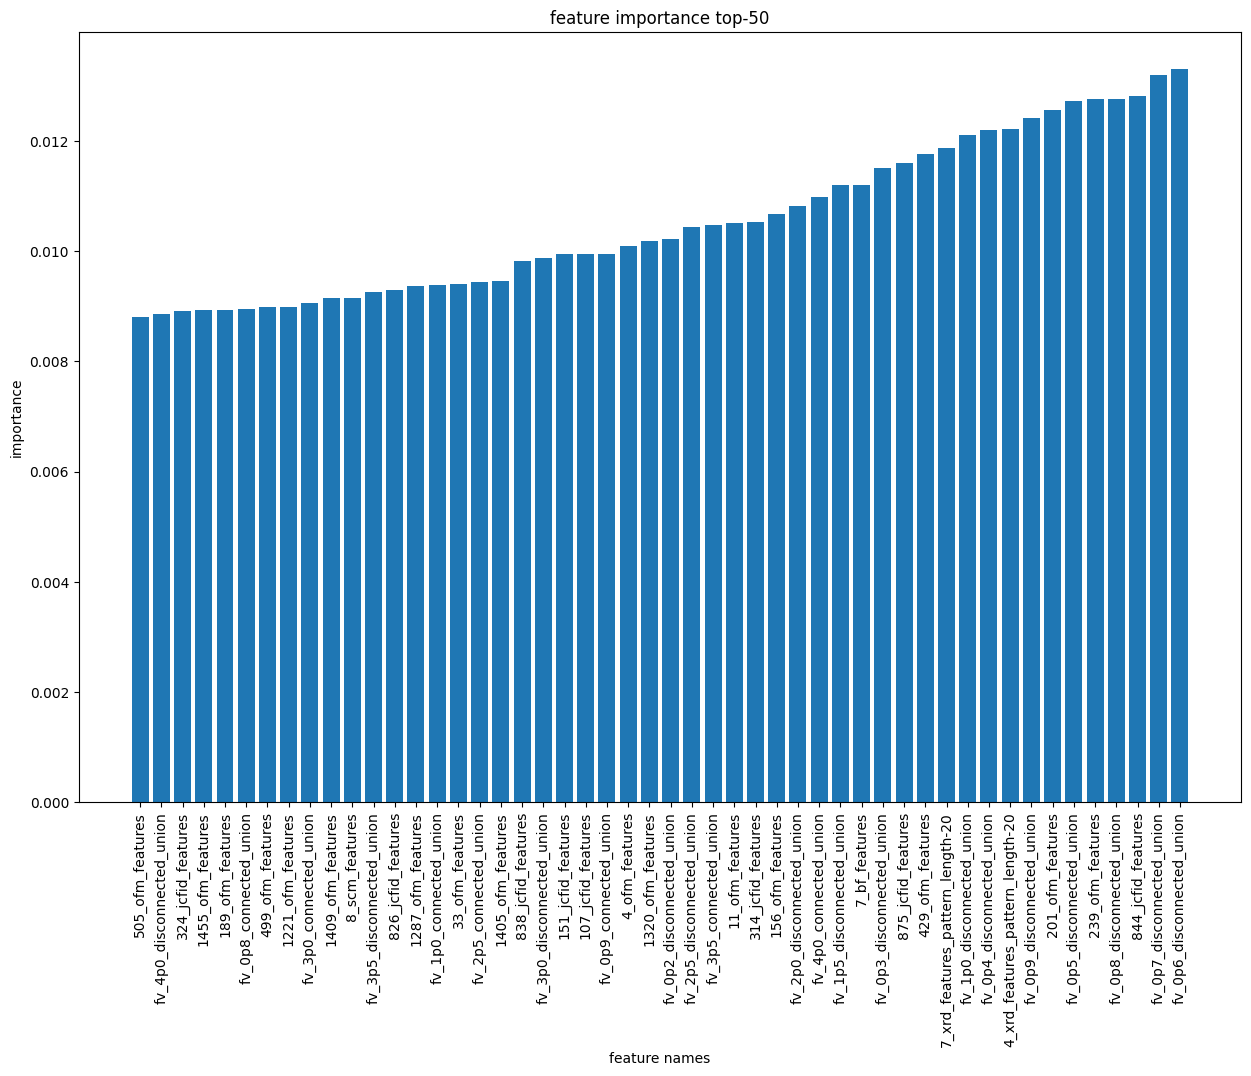

In [12]:
pipeline_logreg_l2.plot_feature_importance()

In [14]:
import warnings
warnings.filterwarnings("ignore")

params = {
        "max_iter": 300,
        "penalty": "l1",
        "solver": "saga",
        "C": 0.2
    }

pipeline_logreg_l1 = ModelEvaluation(df_kahle_fin, model_name = 'logreg', params = params)
pipeline_logreg_l1.fit(X_kahle_merged, feature_weights_merged, thr_positive = 1e-1, thr_negative = 1e-2, feature_names = feature_names_merged)
pipeline_logreg_l1.evaluate(num_of_evaluations = 1, X_mpdb = X_exp_merged)
pipeline_logreg_l1.get_aggregated_statistics()

  0%|          | 0/1 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.9011684518013632
test roc-auc mean: 0.7624936831189667, std: 0.05520951562196289
mean train roc-auc: 0.902990356487953


100%|██████████| 100/100 [00:00<00:00, 888.76it/s]


In [14]:
pipeline_logreg_l1.show_results()

,statistic,result
0,mean train roc-auc averaged by 40 models,0.902947
1,roc_auc on test by aggregated preds,0.763036
2,mean test roc-auc averaged by 40 models,0.764601
3,roc_like_comparison by aggregated preds,70.475112
4,roc_like_comparison averaged by 40 models,70.475112
5,roc_like_comparison std,0.000000


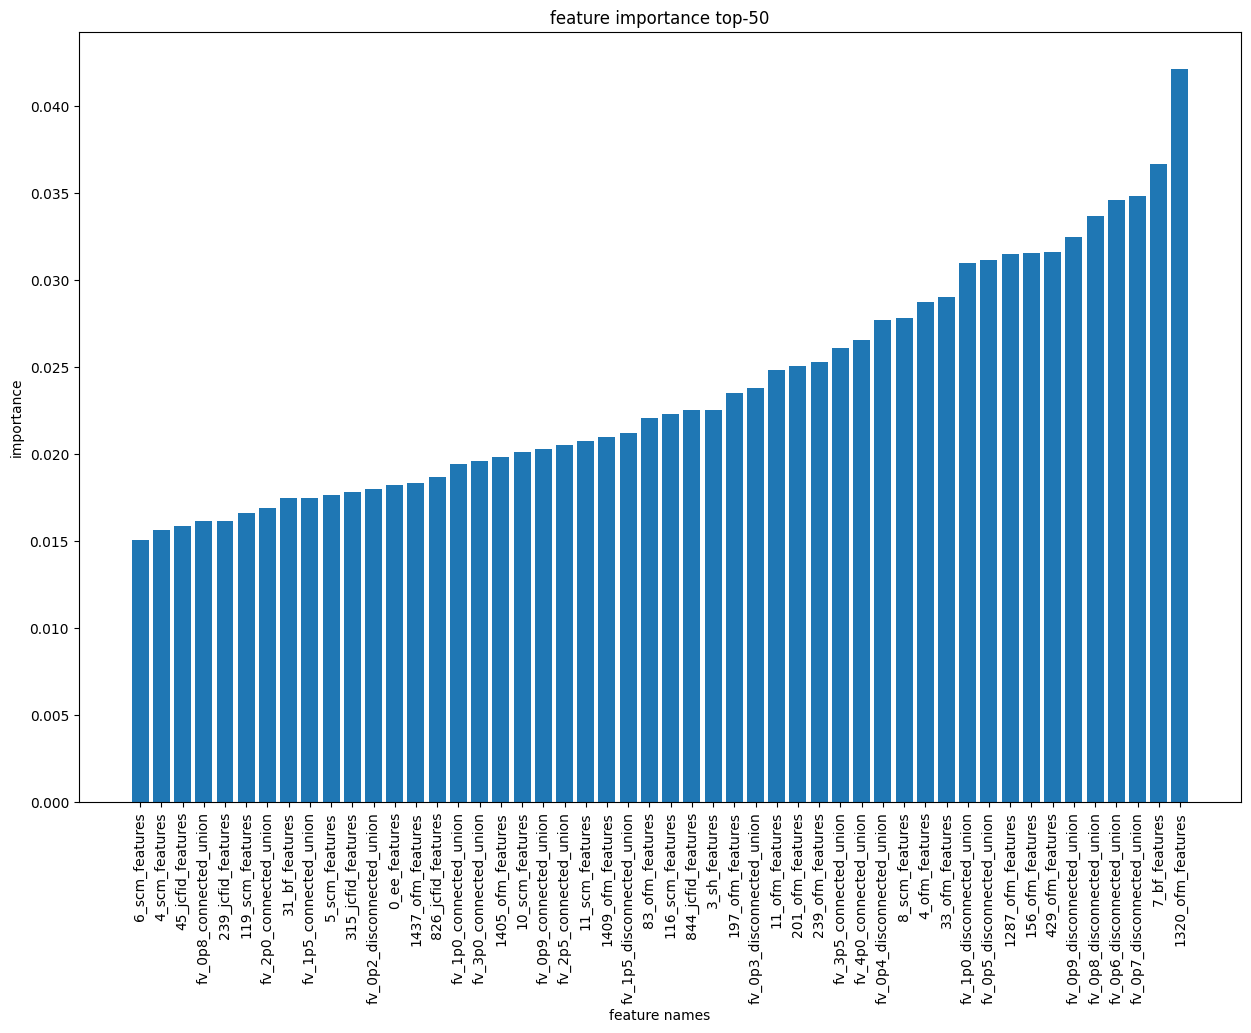

In [29]:
pipeline_logreg_l1.plot_feature_importance()

In [15]:
params = {
        "max_depth": 2,
        "learning_rate" : 0.1,
        "iterations": 40,
    }

pipeline_catboost = ModelEvaluation(df_kahle_fin, model_name = 'catboost', params = params)
pipeline_catboost.fit(X_kahle_merged, feature_weights_merged, thr_positive = 1e-1, thr_negative = 1e-2, feature_names = feature_names_merged)
pipeline_catboost.evaluate(num_of_evaluations = 10, X_mpdb = X_exp_merged)
pipeline_catboost.get_aggregated_statistics()

  0%|          | 0/10 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.902304446608244
test roc-auc mean: 0.7236549898604222, std: 0.06089275580629945
mean train roc-auc: 0.9064383309189395


100%|██████████| 100/100 [00:00<00:00, 901.89it/s]


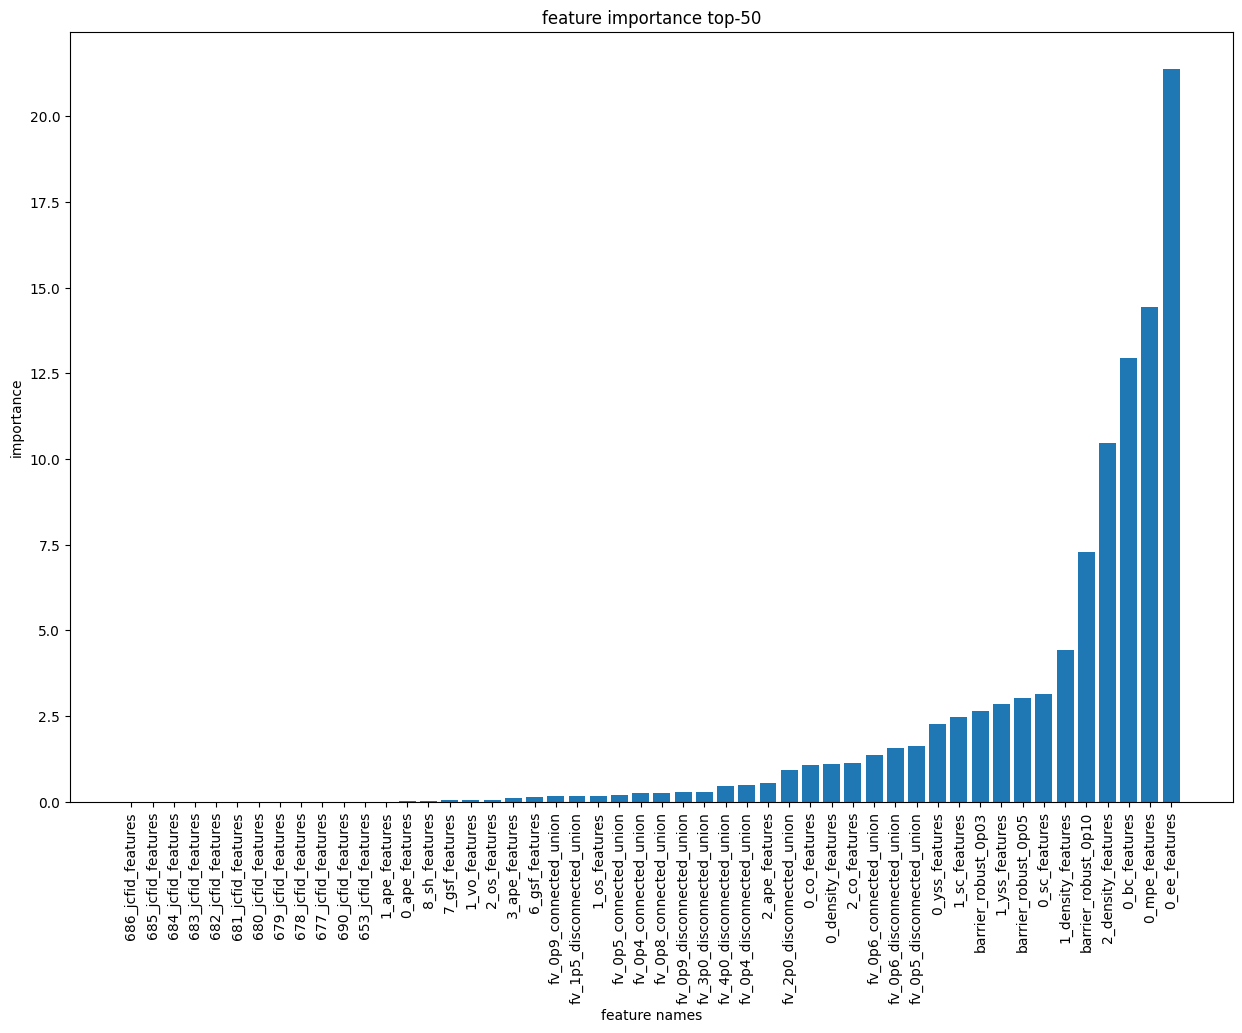

In [17]:
pipeline_catboost.plot_feature_importance()

In [ ]:
pipelines_catboost = []

for i in range(5):
    pipeline = ModelEvaluation(df_kahle_fin, model_name = 'catboost', params = params)
    pipeline.fit(X_kahle_merged, feature_weights_merged, thr_positive = 1e-1, thr_negative = 1e-2, feature_names = feature_names_merged)
    pipeline.evaluate(num_of_evaluations = 10, X_mpdb = X_mpdb_merged)
    pipeline.get_aggregated_statistics()
    pipelines_catboost.append(pipeline)

In [20]:
pipeline_catboost.show_results()

,statistic,result
0,mean train roc-auc averaged by 40 models,0.905691
1,roc_auc on test by aggregated preds,0.724477
2,mean test roc-auc averaged by 40 models,0.720664
3,roc_like_comparison by aggregated preds,50.429931
4,roc_like_comparison averaged by 40 models,47.496397
5,roc_like_comparison std,3.934617


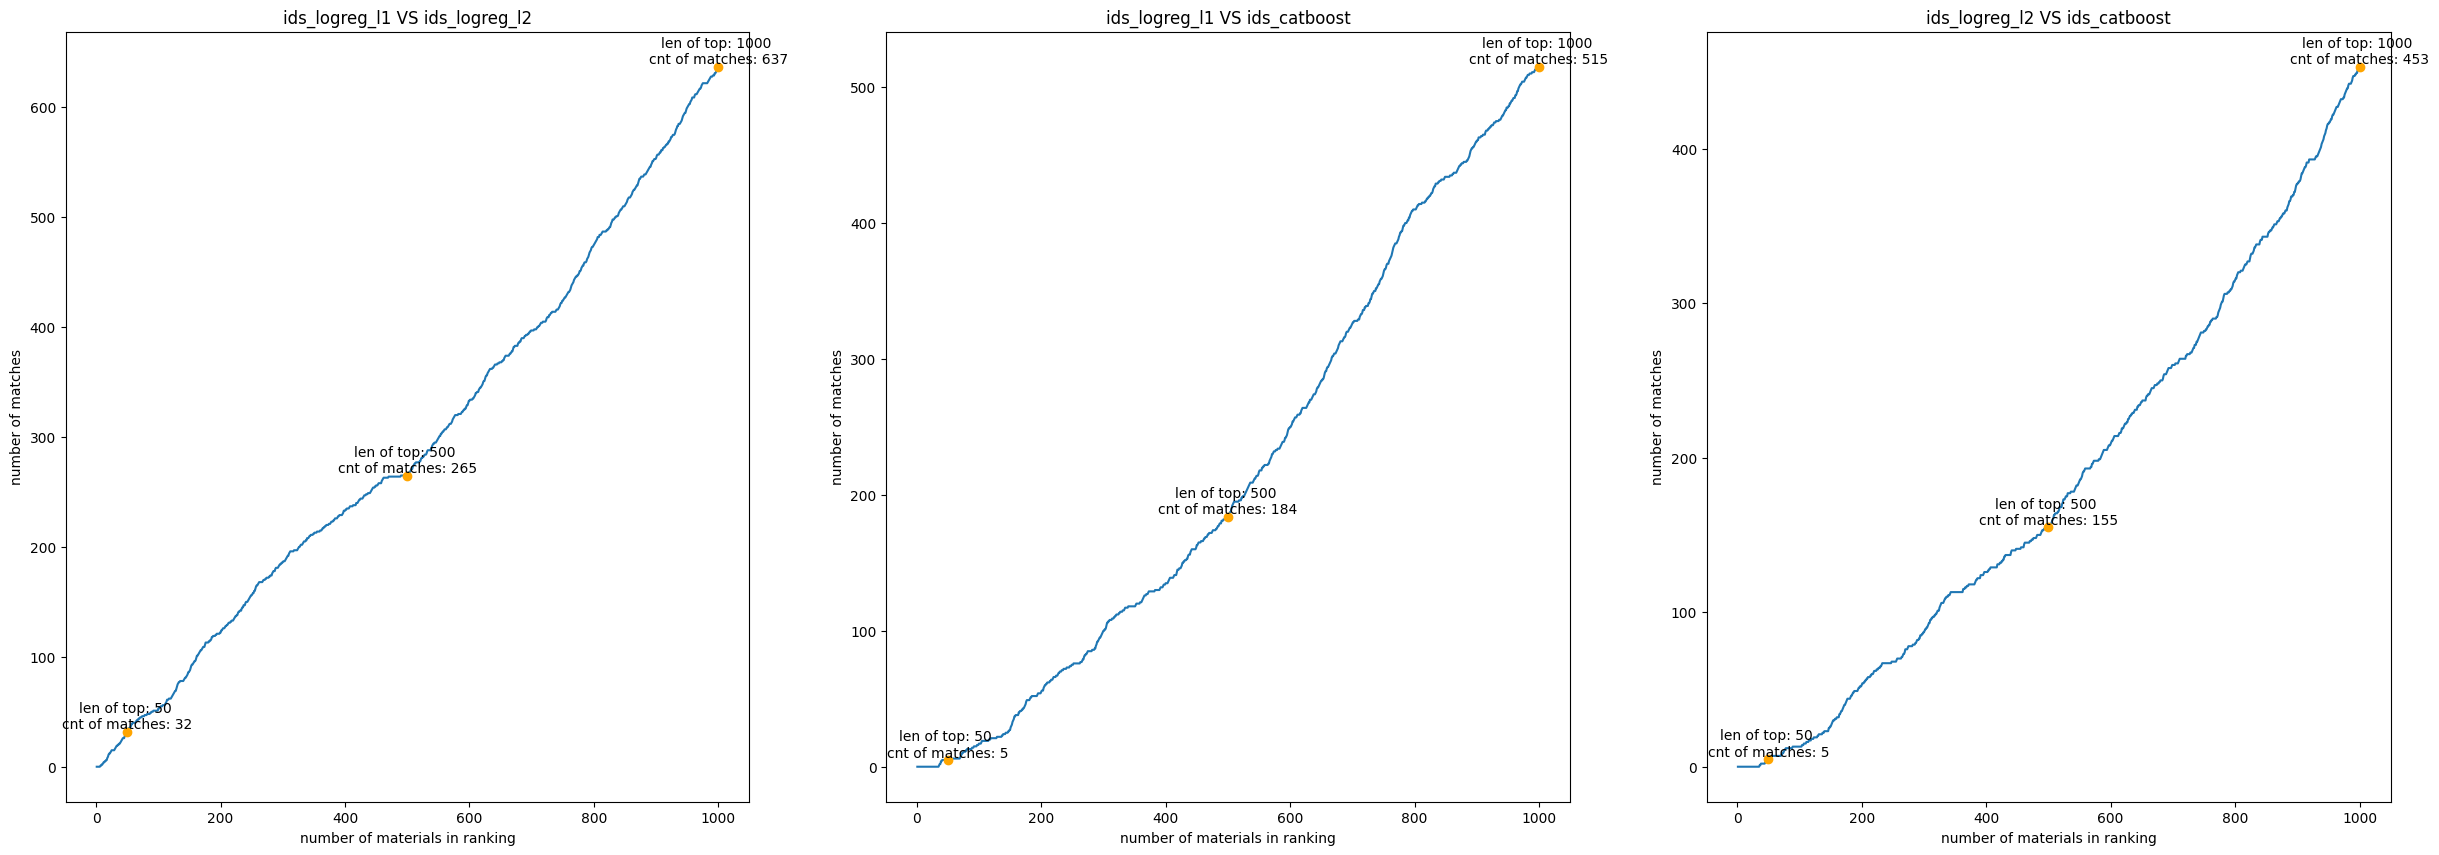

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

mp_ids = pd.read_csv('fv.v2.Kahle2020-upd2024-03-04/exported.predictions.mp.v2.csv')['material_id'].to_numpy()

ids_catboost = [mp_ids[np.argsort(pipeline_catboost.preds_mpdb_averaged[-1])[::-1]]]
ids_logreg_l2 = [mp_ids[np.argsort(pipeline_logreg_l2.preds_mpdb_averaged[-1])[::-1]]]
ids_logreg_l1 = [mp_ids[np.argsort(pipeline_logreg_l1.preds_mpdb_averaged[-1])[::-1]]]


plot_matches(axs[0], ids_logreg_l1 + ids_logreg_l2, 'ids_logreg_l1 VS ids_logreg_l2')
plot_matches(axs[1], ids_logreg_l1 + ids_catboost, 'ids_logreg_l1 VS ids_catboost')
plot_matches(axs[2], ids_logreg_l2 + ids_catboost, 'ids_logreg_l2 VS ids_catboost')

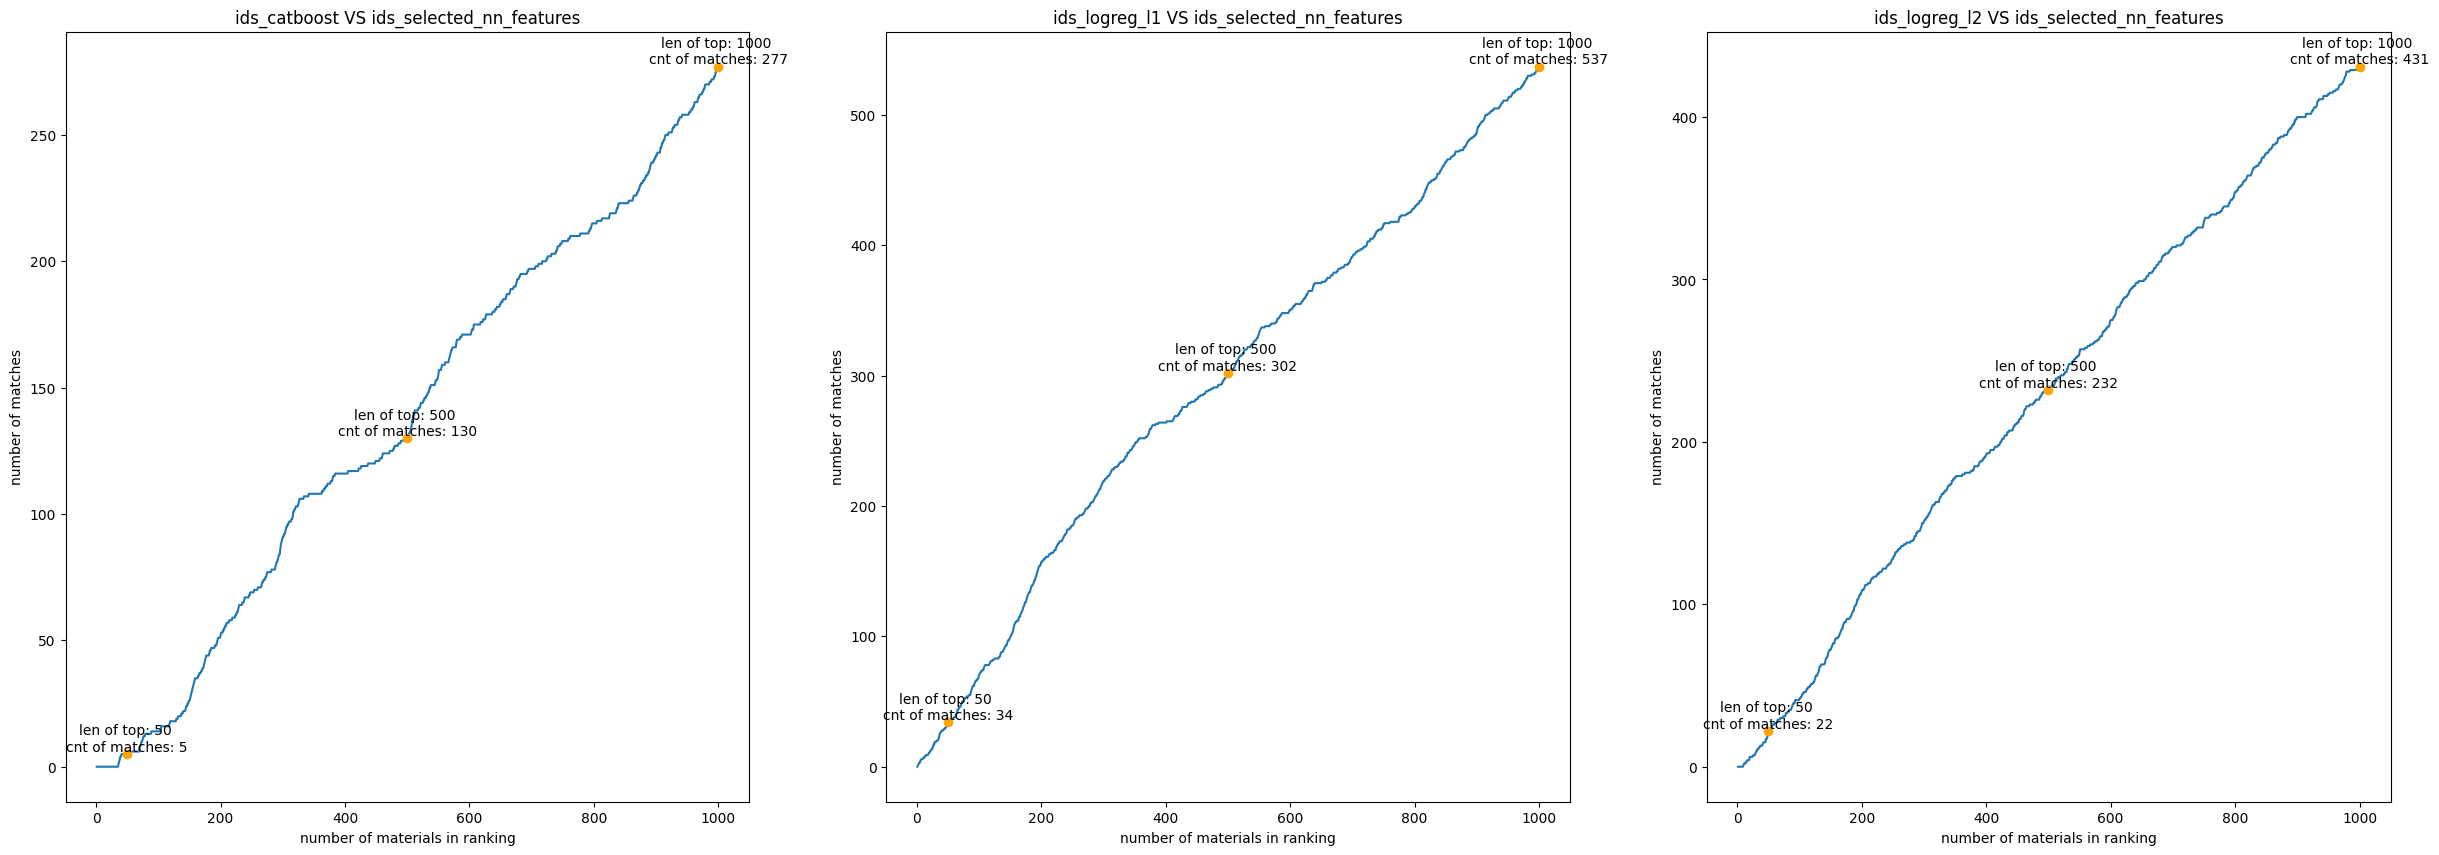

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

ids_selected_nn_features = pd.read_csv('fv.analysis.2.2_condNE.predictions.csv')['material_id'].to_list()

plot_matches(axs[0], ids_catboost + [ids_selected_nn_features], 'ids_catboost VS ids_selected_nn_features')
plot_matches(axs[1], ids_logreg_l1 + [ids_selected_nn_features], 'ids_logreg_l1 VS ids_selected_nn_features')
plot_matches(axs[2], ids_logreg_l2 + [ids_selected_nn_features], 'ids_logreg_l2 VS ids_selected_nn_features')

In [20]:
mp_ids = pd.read_csv('fv.v2.Kahle2020-upd2024-03-04/exported.predictions.mp.v2.csv')['material_id'].to_list()
preds_logreg_l2 = pipeline_logreg_l2.preds_mpdb_averaged[-1]
preds_catboost = pipeline_catboost.preds_mpdb_averaged[-1]
preds_logreg_l1 = pipeline_logreg_l1.preds_mpdb_averaged[-1]

df_preds_logreg_l2 = pd.DataFrame({
    'mp': mp_ids,
    'preds': preds_logreg_l2
})


df_preds_catboost = pd.DataFrame({
    'mp': mp_ids,
    'preds': preds_catboost
})



df_preds_logreg_l1 = pd.DataFrame({
    'mp': mp_ids,
    'preds': preds_logreg_l1
})


In [21]:
df_preds_logreg_l1.to_csv('df_preds_logreg_l1_merged.csv')
df_preds_logreg_l2.to_csv('df_preds_logreg_l2_merged.csv')
df_preds_catboost.to_csv('df_preds_catboost_merged.csv')

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


df_preds_logreg_l1 = pd.read_csv('df_preds_logreg_l1_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)
df_preds_logreg_l2 = pd.read_csv('df_preds_logreg_l2_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)
df_preds_catboost = pd.read_csv('df_preds_catboost_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)


ids_catboost = df_preds_catboost['mp'].to_list()
ids_logreg_l1 = df_preds_logreg_l1['mp'].to_list()
ids_logreg_l2 = df_preds_logreg_l2['mp'].to_list()


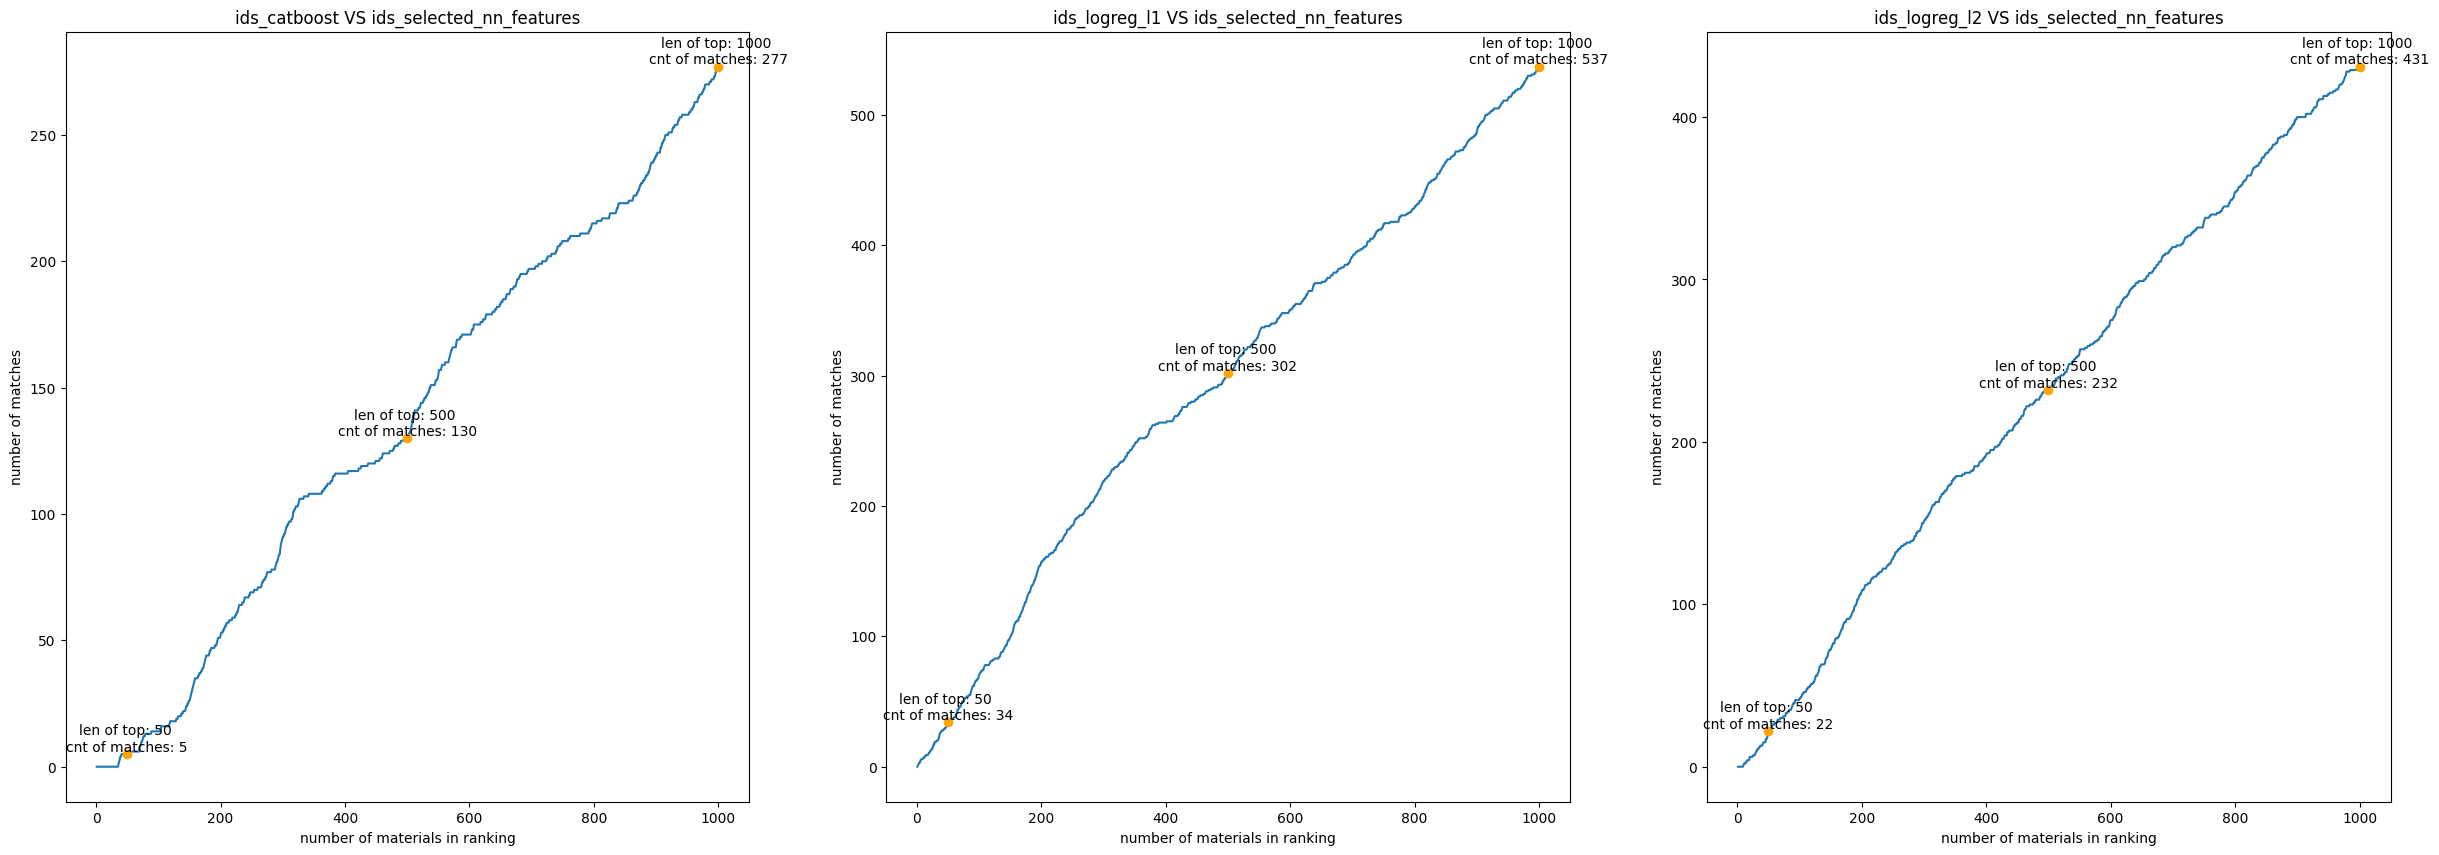

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

plot_matches(axs[0], [ids_catboost] + [ids_selected_nn_features], 'ids_catboost VS ids_selected_nn_features')
plot_matches(axs[1], [ids_logreg_l1] + [ids_selected_nn_features], 'ids_logreg_l1 VS ids_selected_nn_features')
plot_matches(axs[2], [ids_logreg_l2] + [ids_selected_nn_features], 'ids_logreg_l2 VS ids_selected_nn_features')

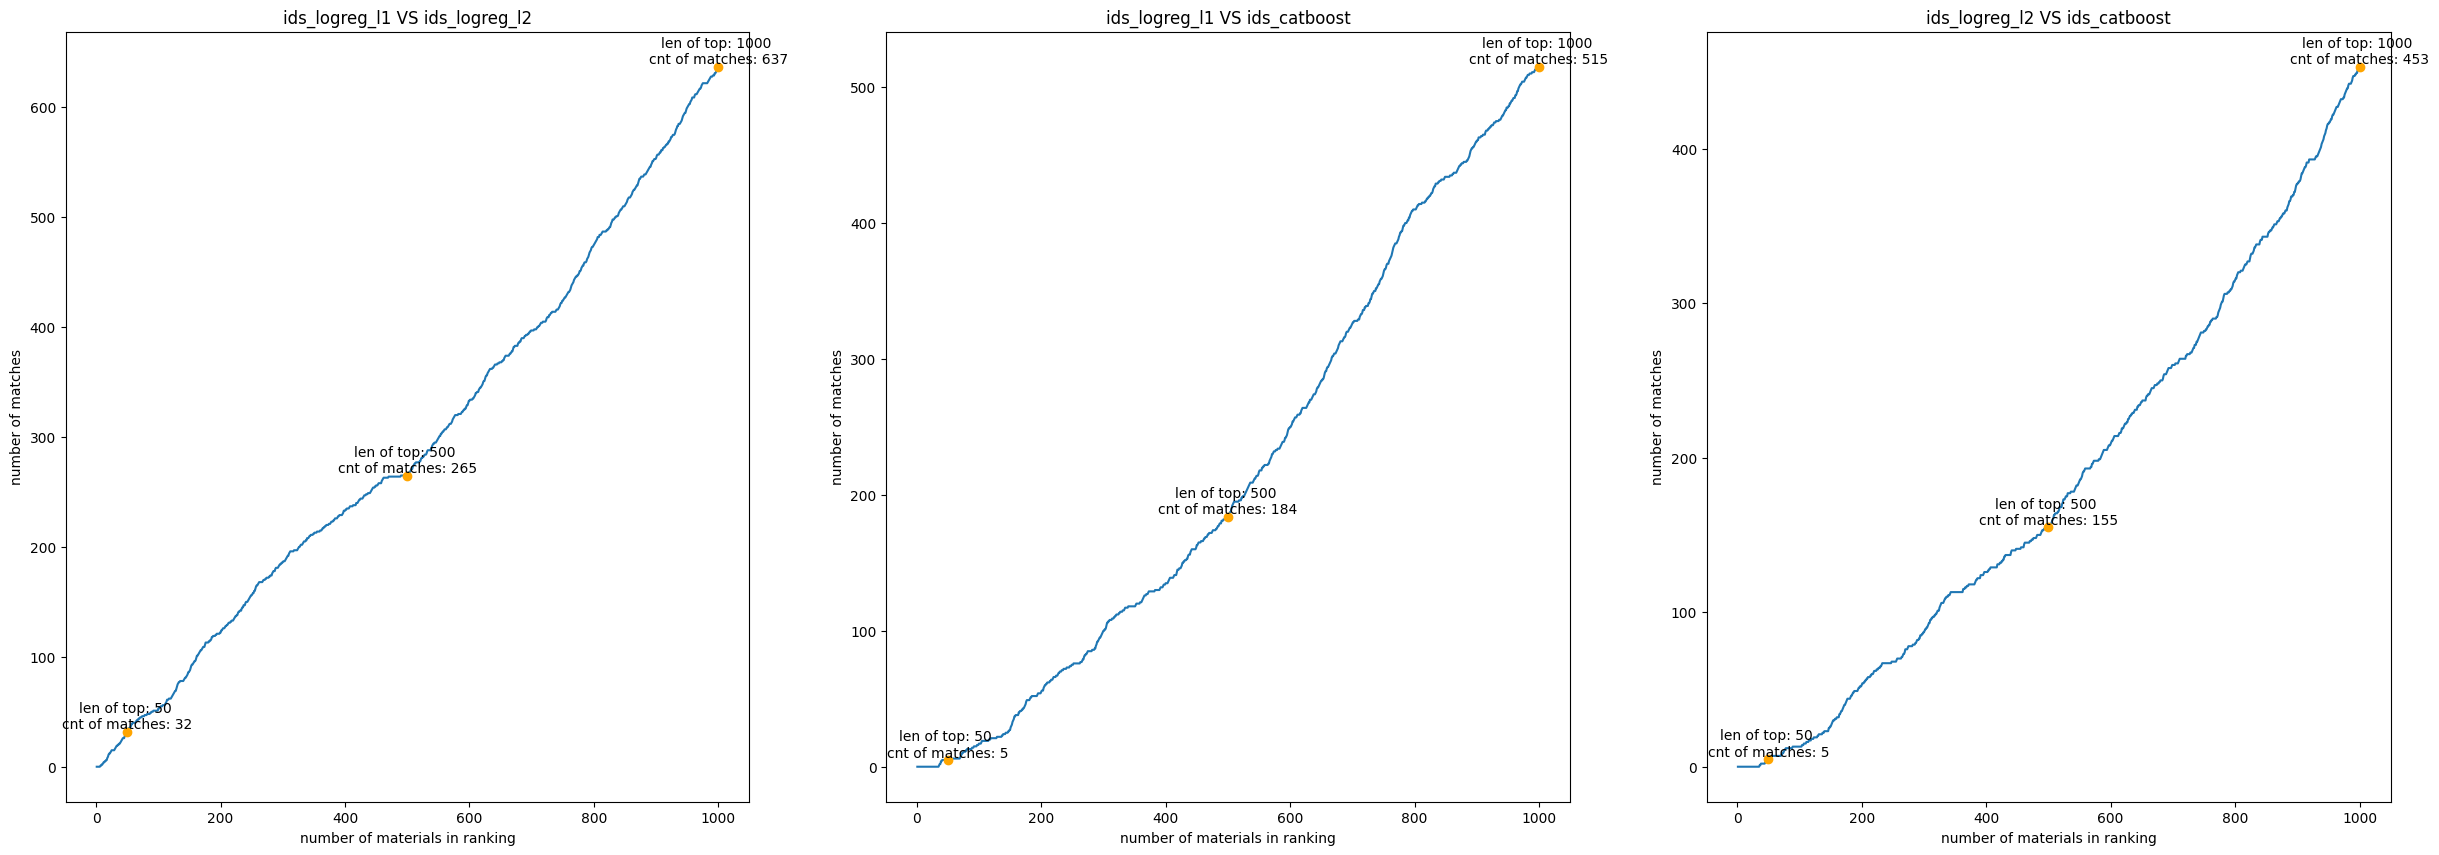

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

plot_matches(axs[0], [ids_logreg_l1] + [ids_logreg_l2], 'ids_logreg_l1 VS ids_logreg_l2')
plot_matches(axs[1], [ids_logreg_l1] + [ids_catboost], 'ids_logreg_l1 VS ids_catboost')
plot_matches(axs[2], [ids_logreg_l2] + [ids_catboost], 'ids_logreg_l2 VS ids_catboost')

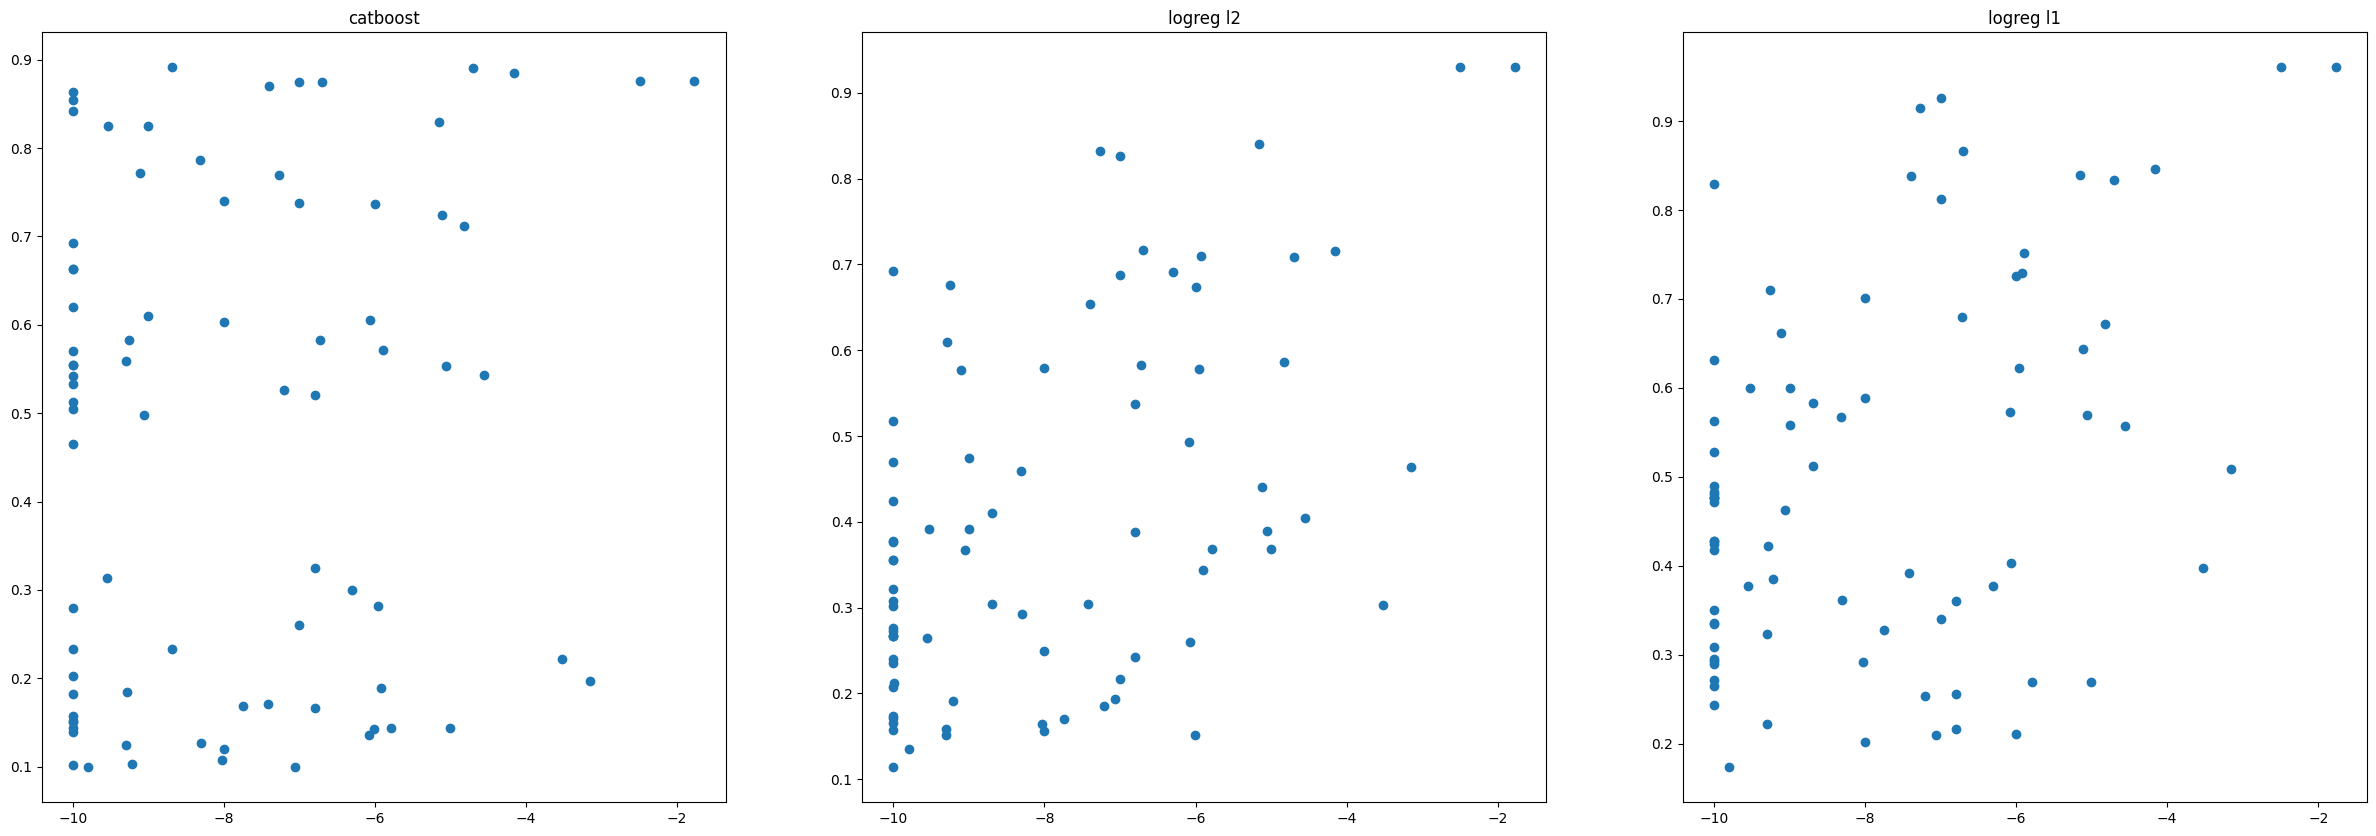

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

experimental_dataset = pd.read_csv('mpr_test/mp_Laskowski2023_map.csv')



# df_preds_logreg_l1 = pd.read_csv('df_preds_logreg_l1_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)
# df_preds_logreg_l2 = pd.read_csv('df_preds_logreg_l2_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)
# df_preds_catboost = pd.read_csv('df_preds_catboost_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)


df_preds_logreg_l1 = pd.read_csv('df_preds_logreg_l1_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)
df_preds_logreg_l2 = pd.read_csv('df_preds_logreg_l2_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)
df_preds_catboost = pd.read_csv('df_preds_catboost_merged.csv')[['mp', 'preds']].sort_values(by = ['preds'], ascending = False)

ids_selected_nn_features = pd.read_csv('fv.analysis.2.2_condNE.predictions.csv')['material_id'].to_list()

ids_catboost = df_preds_catboost['mp'].to_list()
ids_logreg_l1 = df_preds_logreg_l1['mp'].to_list()
ids_logreg_l2 = df_preds_logreg_l2['mp'].to_list()

df_preds_logreg_l2 = df_preds_logreg_l2[df_preds_logreg_l2['mp'].isin(experimental_dataset['mp'].to_list())]
df_preds_catboost = df_preds_catboost[df_preds_catboost['mp'].isin(experimental_dataset['mp'].to_list())]
df_preds_logreg_l1 = df_preds_logreg_l1[df_preds_logreg_l1['mp'].isin(experimental_dataset['mp'].to_list())]

df_preds_logreg_l2 = df_preds_logreg_l2.merge(experimental_dataset, left_on = ['mp'], right_on = ['mp'])
df_preds_catboost = df_preds_catboost.merge(experimental_dataset, left_on = ['mp'], right_on = ['mp'])
df_preds_logreg_l1 = df_preds_logreg_l1.merge(experimental_dataset, left_on = ['mp'], right_on = ['mp'])

df_preds_catboost['σ(RT)(S cm-1)'] = df_preds_catboost['σ(RT)(S cm-1)'].apply(lambda x: float(x) if x.find('<') == -1 else 1e-18)
df_preds_logreg_l2['σ(RT)(S cm-1)'] = df_preds_logreg_l2['σ(RT)(S cm-1)'].apply(lambda x: float(x) if x.find('<') == -1 else 1e-18)
df_preds_logreg_l1['σ(RT)(S cm-1)'] = df_preds_logreg_l1['σ(RT)(S cm-1)'].apply(lambda x: float(x) if x.find('<') == -1 else 1e-18)



df_preds_catboost['σ(RT)(S cm-1)'].clip(1e-10, inplace = True)
df_preds_logreg_l1['σ(RT)(S cm-1)'].clip(1e-10, inplace = True)
df_preds_logreg_l2['σ(RT)(S cm-1)'].clip(1e-10, inplace = True)



def plot_distribution(axs, df, title):
    axs.set_title(title)
    axs.scatter(np.log10(df['σ(RT)(S cm-1)']), df['preds'])


fig, axs = plt.subplots(1, 3, figsize=(30, 10))

plot_distribution(axs[0], df_preds_catboost, 'catboost')
plot_distribution(axs[1], df_preds_logreg_l2, 'logreg l2')
plot_distribution(axs[2], df_preds_logreg_l1, 'logreg l1')

plt.show()

In [3]:
df_preds_logreg_l1['mp'].to_list()

['mp-641703',
 'mp-641703',
 'mp-22899',
 'mp-11175',
 'mp-30249',
 'mp-1195718',
 'mp-28326',
 'mp-23497',
 'mp-1194700',
 'mp-29582',
 'mp-1194339',
 'mp-1190102',
 'mp-29151',
 'mp-22983',
 'mp-1104386',
 'mp-760502',
 'mp-22955',
 'mp-1190364',
 'mp-29009',
 'mp-18640',
 'mp-4556',
 'mp-28593',
 'mp-541661',
 'mp-541661',
 'mp-30209',
 'mp-19373',
 'mp-557964',
 'mp-554395',
 'mp-541272',
 'mp-28450',
 'mp-557189',
 'mp-1203440',
 'mp-6248',
 'mp-554917',
 'mp-736',
 'mp-10520',
 'mp-6521',
 'mp-1203004',
 'mp-6175',
 'mp-2878',
 'mp-2878',
 'mp-1020019',
 'mp-6783',
 'mp-1020022',
 'mp-1020022',
 'mp-13843',
 'mp-5418',
 'mp-5840',
 'mp-27968',
 'mp-2251',
 'mp-28253',
 'mp-4156',
 'mp-15254',
 'mp-4558',
 'mp-4657',
 'mp-3524',
 'mp-1020057',
 'mp-8184',
 'mp-1198780',
 'mp-1020646',
 'mp-7020',
 'mp-559848',
 'mp-18147',
 'mp-5854',
 'mp-558105',
 'mp-14495',
 'mp-4779',
 'mp-15845',
 'mp-942733',
 'mp-942733',
 'mp-6442',
 'mp-684024',
 'mp-5853',
 'mp-27275',
 'mp-7535',
 'mp-

In [12]:
from misc_utils.feature_analysis import *

def calculate_ROClikeComparisonMetrics_exp_dataset(df):
    df = df.rename(columns={df.columns[3]: 'sigma_S_cm'})

    rlcm = ROClikeComparisonMetrics()
    features_meta_info = pd.DataFrame({'name': ['preds'], 'weighted_direction': [1]})
    features_meta_info = features_meta_info.set_index(features_meta_info.columns[0])

    feature_scores = rlcm.eval_features(
        preds_df = df[['preds', 'sigma_S_cm']], 
        features_meta_info = features_meta_info,
        positive_thr=5e-5,
        negative_thr=1e-5,
        weight_validation_plots=False,
        dataset_type="experimental",
        experimental_error_relative=1.0,
        num_bootstrap_samples=1000,
        num_negatives_max=10.0,
    )

    return  round(feature_scores['score']['preds'], 3), round(feature_scores['score_bs_q16']['preds'], 3), round(feature_scores['score_bs_q50']['preds'], 3), round(feature_scores['score_bs_q84']['preds'], 3)

print(calculate_ROClikeComparisonMetrics_exp_dataset(df_preds_logreg_l1))
print(calculate_ROClikeComparisonMetrics_exp_dataset(df_preds_logreg_l2))
print(calculate_ROClikeComparisonMetrics_exp_dataset(df_preds_catboost))


100%|██████████| 1000/1000 [00:01<00:00, 870.74it/s]


(22.783, 9.245, 21.539, 36.297)


100%|██████████| 1000/1000 [00:01<00:00, 866.13it/s]


(22.305, 9.225, 21.473, 36.168)


100%|██████████| 1000/1000 [00:01<00:00, 915.89it/s]


(21.624, 9.025, 19.707, 32.812)


In [7]:

print(calculate_ROClikeComparisonMetrics_exp_dataset(df_preds_catboost))

100%|██████████| 1000/1000 [00:01<00:00, 882.05it/s]


           score                                            roclike  \
name                                                                  
preds  21.624267  ([0.0, 0.0, 0.016947426762344637, 0.6738635018...   

       score_bs_q16  score_bs_q50  score_bs_q84  
name                                             
preds      9.025051     19.707365     32.811795  


In [17]:
preds_catboost = pipeline_catboost.preds_mpdb_averaged[-1]
preds_logreg_l1 = pipeline_logreg_l1.preds_mpdb_averaged[-1]
preds_logreg_l2 = pipeline_logreg_l2.preds_mpdb_averaged[-1]


In [19]:
print(len(preds_catboost))
print(len(preds_logreg_l1))
print(len(preds_logreg_l2))

144
144
144


In [21]:
df_mp_exp['preds_catboost'] = preds_catboost
df_mp_exp['preds_logreg_l1'] = preds_logreg_l1
df_mp_exp['preds_logreg_l2'] = preds_logreg_l2

df_mp_exp['sigma_S_cm'] = df_mp_exp['sigma_S_cm'].apply(lambda x: float(x) if x.find('<') == -1 else 1e-10)
df_mp_exp['sigma_S_cm'].clip(1e-10, inplace = True)

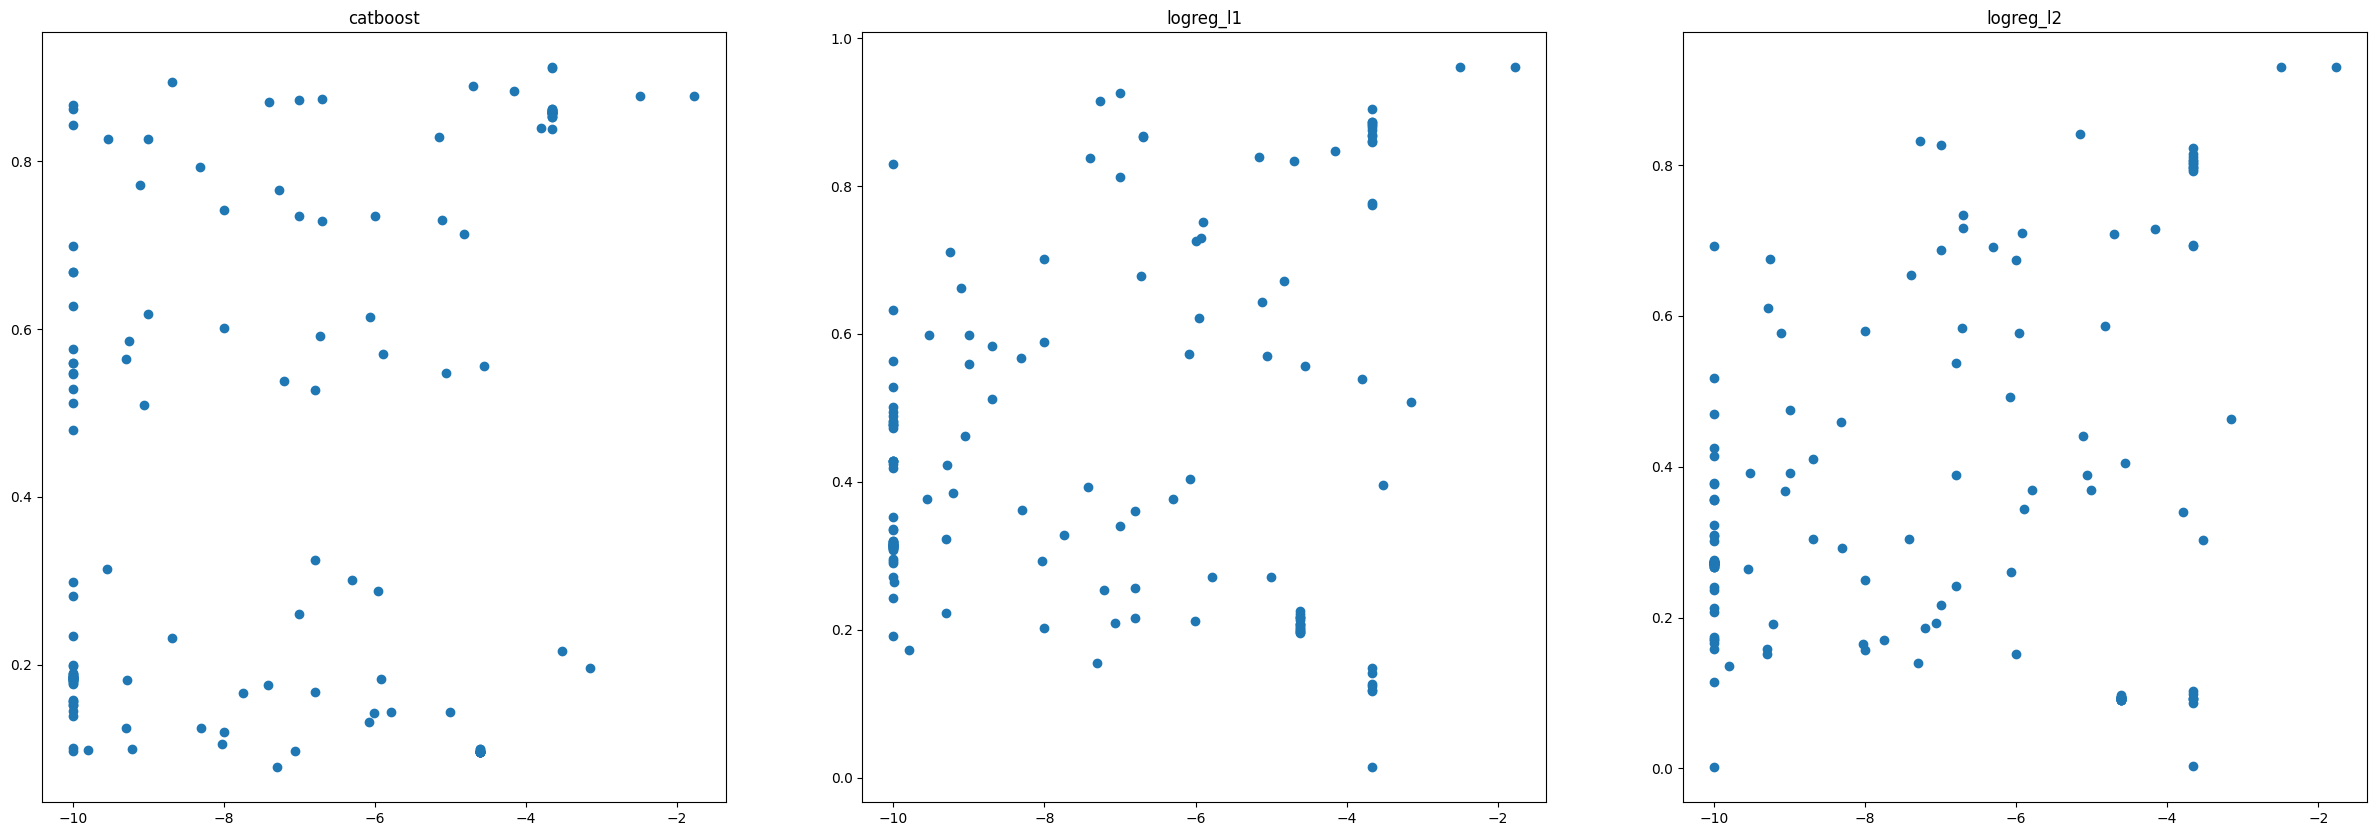

In [22]:
def plot_distribution(axs, sigma, preds, title):
    axs.set_title(title)
    axs.scatter(np.log10(sigma), preds)


fig, axs = plt.subplots(1, 3, figsize=(30, 10))

plot_distribution(axs[0], df_mp_exp['sigma_S_cm'], df_mp_exp['preds_catboost'], 'catboost')
plot_distribution(axs[1], df_mp_exp['sigma_S_cm'], df_mp_exp['preds_logreg_l1'],'logreg_l1')
plot_distribution(axs[2], df_mp_exp['sigma_S_cm'], df_mp_exp['preds_logreg_l2'],'logreg_l2')

plt.show()

In [23]:
df_mp_exp.to_csv('df_mp_exp_featurizers_and_nn.csv')

In [25]:
df_mp_exp['preds_agg'] = (df_mp_exp['preds_catboost'] + df_mp_exp['preds_logreg_l1'] + df_mp_exp['preds_logreg_l2']) / 3

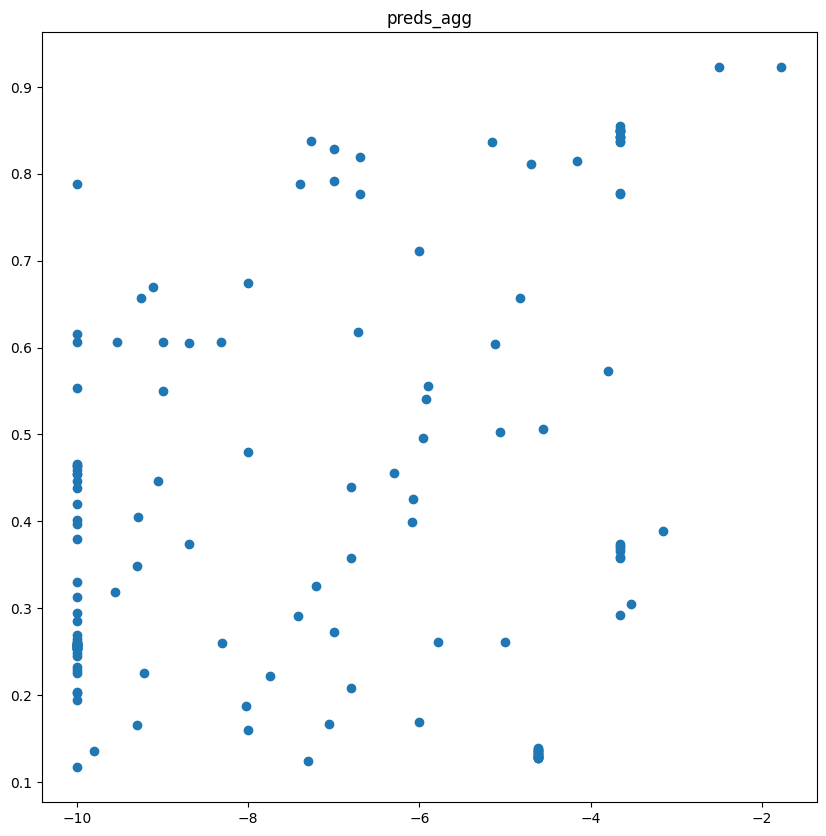

In [28]:
def plot_distribution(axs, sigma, preds, title):
    axs.set_title(title)
    axs.scatter(np.log10(sigma), preds)


fig, axs = plt.subplots(1, 1, figsize=(10, 10))

plot_distribution(axs, df_mp_exp['sigma_S_cm'], df_mp_exp['preds_agg'], 'preds_agg')

plt.show()

In [24]:
from misc_utils.feature_analysis import *


def calculate_ROClikeComparisonMetrics_exp_dataset(df, name_of_prediction_column):
    rlcm = ROClikeComparisonMetrics()
    features_meta_info = pd.DataFrame({'name': [name_of_prediction_column], 'weighted_direction': [1]})
    features_meta_info = features_meta_info.set_index(features_meta_info.columns[0])

    feature_scores = rlcm.eval_features(
        preds_df = df[[name_of_prediction_column, 'sigma_S_cm', 'sample_weight']], 
        features_meta_info = features_meta_info,
        positive_thr=5e-5,
        negative_thr=1e-5,
        weight_validation_plots=False,
        dataset_type="experimental",
        experimental_error_relative=1.0,
        num_bootstrap_samples=1000,
        num_negatives_max=10.0,
    )

    return feature_scores['score']


print(calculate_ROClikeComparisonMetrics_exp_dataset(df_mp_exp, 'preds_logreg_l1'))
print(calculate_ROClikeComparisonMetrics_exp_dataset(df_mp_exp, 'preds_logreg_l2'))
print(calculate_ROClikeComparisonMetrics_exp_dataset(df_mp_exp, 'preds_catboost'))


Found sample weights!


100%|██████████| 1000/1000 [00:01<00:00, 859.05it/s]


name
preds_logreg_l1    16.730219
Name: score, dtype: float64
Found sample weights!


100%|██████████| 1000/1000 [00:01<00:00, 901.31it/s]


name
preds_logreg_l2    16.251895
Name: score, dtype: float64
Found sample weights!


100%|██████████| 1000/1000 [00:01<00:00, 895.82it/s]

name
preds_catboost    19.437746
Name: score, dtype: float64
